In [132]:
import re
import math
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,precision_score , recall_score , confusion_matrix , f1_score
from sklearn.model_selection import GridSearchCV
from ast import literal_eval
from gensim.models.keyedvectors import KeyedVectors
from sklearn.decomposition import PCA
pca = PCA(n_components=40)
from sklearn import datasets, metrics, model_selection
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [133]:
#data_train = pd.read_csv('./data/twitter_data_before_analysis.csv', error_bad_lines=False)
data_train = pd.read_csv('./data/twitter_data_before_analysis1.csv', error_bad_lines=False)
data_train = data_train.append(pd.read_csv('./data/ko_news_data_before_analysis.csv', error_bad_lines=False))
data_train = data_train.append(pd.read_csv('./data/en_news_data_before_analysis.csv', error_bad_lines=False))

In [134]:
data_train['period'] = pd.to_numeric(data_train['period'], errors='coerce')
data_train['category'] = pd.to_numeric(data_train['category'], errors='coerce')
data_train['label'] = pd.to_numeric(data_train['label'], errors='coerce')
data_train['Silhouette'] = pd.to_numeric(data_train['Silhouette'], errors='coerce')

In [135]:
print(len(data_train))

187533


In [136]:
X_train = data_train[data_train.columns.difference(['result'])]

In [137]:
#x_data_df = data_train[['period','raw_data','closer#','category','label','Silhouette']]
y_train = data_train['result']

In [138]:
X_train = X_train.drop('Unnamed: 0', axis=1)

In [139]:
X_train

,C1,C10,C100,C11,C12,C13,C14,C15,C16,C17,...,C95,C96,C97,C98,C99,Silhouette,category,closer#,label,period
0,-0.001495,0.002059,-0.003641,0.002519,-0.000030,-0.000061,0.000266,-0.001268,-0.005870,0.004812,...,-0.001215,-0.005617,-0.000767,0.003659,-0.001297,0.126229,3.0,2,1.0,202011
1,-0.021860,0.025023,-0.030539,-0.053737,-0.034043,-0.106272,0.101318,0.046353,-0.032074,0.056494,...,-0.085919,-0.086635,-0.032728,0.003305,0.029844,0.126229,3.0,2,12.0,202011
2,-0.006153,0.000252,-0.000431,-0.007744,-0.001371,-0.012007,0.004584,-0.001146,-0.006225,0.003439,...,-0.002505,-0.002000,-0.006141,-0.000919,0.005992,0.126229,3.0,2,13.0,202011
3,-0.011715,0.010112,-0.014666,-0.018584,-0.010574,-0.035928,0.037478,0.020299,-0.011364,0.024920,...,-0.035902,-0.030800,-0.010657,0.002631,0.007532,0.126229,3.0,2,12.0,202011
4,-0.004312,0.010082,-0.009291,-0.017374,-0.011016,-0.033451,0.031159,0.015416,-0.016344,0.022197,...,-0.027211,-0.024827,-0.013575,-0.000735,0.013313,0.126229,3.0,2,12.0,202011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112261,0.002639,-0.007745,0.015926,-0.011952,-0.002111,-0.004357,-0.000599,-0.012847,-0.000155,-0.024394,...,0.005706,0.015451,0.006023,0.001769,0.004318,0.746625,1.0,2,5.0,201924
112262,-0.000535,-0.008106,0.016009,-0.012102,0.005943,-0.004983,-0.004764,-0.011634,0.001370,-0.025071,...,0.004042,0.014530,-0.000182,0.002224,-0.003322,0.746625,1.0,2,5.0,201924
112263,0.004187,0.000229,0.007715,-0.005602,0.004873,-0.005352,-0.002468,-0.003581,0.005097,-0.003656,...,-0.003402,0.004426,-0.001443,0.001934,-0.000474,0.746625,1.0,2,5.0,201924
112264,-0.002951,-0.006462,0.012489,-0.003590,-0.002220,-0.002896,-0.001683,-0.016026,0.004791,-0.019189,...,0.003951,0.013484,0.002950,0.001749,0.001292,0.746625,1.0,2,5.0,201924


In [140]:
btc_data = pd.read_csv('../../analysis/cluster/causeanalysis/BTC/before_BTC_total.csv', error_bad_lines=False)
bch_data = pd.read_csv('../../analysis/cluster/causeanalysis/BCH/before_BCH_total.csv', error_bad_lines=False)
eth_data = pd.read_csv('../../analysis/cluster/causeanalysis/ETH/before_ETH_total.csv', error_bad_lines=False)



In [141]:
data_test = pd.concat([btc_data,bch_data,eth_data],ignore_index=True)

In [142]:
data_test['period'] = pd.to_numeric(data_test['period'], errors='coerce')
data_test['category'] = pd.to_numeric(data_test['category'], errors='coerce')
data_test['label'] = pd.to_numeric(data_test['label'], errors='coerce')
data_test['Silhouette'] = pd.to_numeric(data_test['Silhouette'], errors='coerce')

In [143]:
def trans_result(x) :
    if x==0 :
        return 1
    if x==1 :
        return 2

In [144]:
data_test['result']

0        1
1        1
2        1
3        1
4        1
        ..
91066    0
91067    0
91068    0
91069    0
91070    0
Name: result, Length: 91071, dtype: int64

In [146]:
data_test['result']=data_test['result'].apply(trans_result)

In [149]:
data_test[data_test['result']==0]

,Unnamed: 0,C1,C2,C3,C4,C5,C6,C7,C8,C9,...,C97,C98,C99,C100,period,closer#,category,label,Silhouette,result


In [150]:
print(len(data_test))

header = []
for i in range(1,101) :
    header.append('C'+str(i))

91071


In [151]:
y_test = data_test['result']

In [152]:
X_test = data_test[data_test.columns.difference(['result'])]

In [153]:
X_test = X_test.drop('Unnamed: 0', axis=1)

In [154]:
rf_clf = RandomForestClassifier(random_state = 11 ,n_jobs=-1) # random forest

In [155]:
rf_clf.fit(X_train, y_train)

y_score = rf_clf.predict_proba(X_test)



In [156]:
rf_pred = rf_clf.predict(X_test)  # random forest predict

In [157]:
print('Random Forest Accuracy :  ',accuracy_score(y_test,rf_pred))
print('Random Forest Precision :  ',precision_score(y_test,rf_pred,pos_label='positive',average='weighted'))
print('Random Forest Recall :  ',recall_score(y_test,rf_pred,pos_label='positive',average='weighted'))
print('Random Forest f1 :  ',f1_score(y_test,rf_pred,pos_label='positive',average='weighted'))

Random Forest Accuracy :   0.4285777031107597
Random Forest Precision :   0.6034224432867474
Random Forest Recall :   0.4285777031107597
Random Forest f1 :   0.3678140361898463


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [158]:
y_score

array([[0.6 , 0.16, 0.24],
       [0.63, 0.16, 0.21],
       [0.59, 0.12, 0.29],
       ...,
       [0.51, 0.32, 0.17],
       [0.38, 0.43, 0.19],
       [0.52, 0.35, 0.13]])

In [159]:
from sklearn.preprocessing import label_binarize

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

y_test_roc =label_binarize(y_test, classes=[1, 2, 3])

print(y_test)
print(y_test_roc)

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print('class : ',i,'==',roc_auc[i])



0        2
1        2
2        2
3        2
4        2
        ..
91066    1
91067    1
91068    1
91069    1
91070    1
Name: result, Length: 91071, dtype: int64
[[0 1 0]
 [0 1 0]
 [0 1 0]
 ...
 [1 0 0]
 [1 0 0]
 [1 0 0]]
class :  0 == 0.44857356361411344
class :  1 == 0.4516007926649819
class :  2 == nan


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:813: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [160]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_roc.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

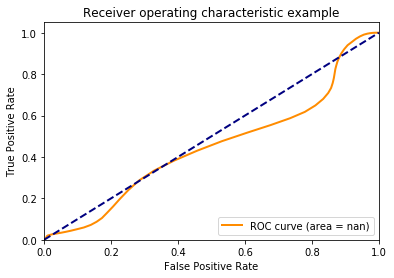

In [161]:
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

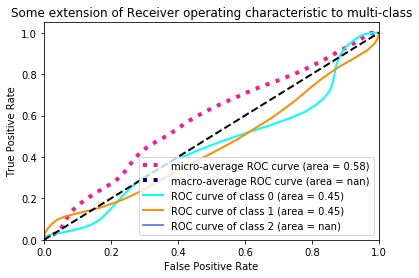

In [162]:
from scipy import interp
from itertools import cycle

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 3

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [163]:
dt_clf = DecisionTreeClassifier(random_state = 11)
dt_clf.fit(X_train,y_train)
dt_pred = dt_clf.predict(X_test)

In [164]:
print('Decision Tree Accuracy :  ',accuracy_score(y_test,dt_pred))
print('Decision Tree Precision :  ',precision_score(y_test,dt_pred,pos_label='positive',average='weighted'))
print('Decision Tree Recall :  ',recall_score(y_test,dt_pred,pos_label='positive',average='weighted'))
print('Decision Tree f1 :  ',f1_score(y_test,dt_pred,pos_label='positive',average='weighted'))

Decision Tree Accuracy :   0.46225472433595766
Decision Tree Precision :   0.7583292176128613
Decision Tree Recall :   0.46225472433595766
Decision Tree f1 :   0.3421329933960325


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [165]:
y_score = dt_clf.predict_proba(X_test)

In [166]:
fpr = dict()
tpr = dict()
roc_auc = dict()

In [167]:
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print('class : ',i,'==',roc_auc[i])

class :  0 == 0.5193908363168221
class :  1 == 0.536032745730453
class :  2 == nan


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:813: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [168]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_roc.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

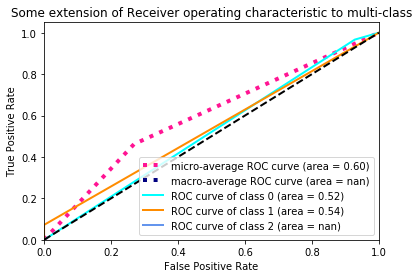

In [169]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 3

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [170]:
#gb_clf = GradientBoostingClassifier(random_state = 11) # random forest
lgbm_clf =  LGBMClassifier(random_state = 11)

In [171]:
#gb_clf.fit(X_train,y_train)
#gb_pred = gb_clf.predict(X_test)

lgbm_clf.fit(X_train,y_train)
lgbm_pred = lgbm_clf.predict(X_test)

In [172]:
#print('Gredient Boosting Accuracy :  ',accuracy_score(y_test,gb_pred))
#print('Gredient Boosting Precision :  ',precision_score(y_test,gb_pred,pos_label='positive',average='weighted'))
#print('Gredient Boosting Recall :  ',recall_score(y_test,gb_pred,pos_label='positive',average='weighted'))
#print('Gredient Boosting f1 :  ',f1_score(y_test,gb_pred,pos_label='positive',average='weighted'))
print('Light GBM Accuracy :  ',accuracy_score(y_test,lgbm_pred))
print('Light GBM Precision :  ',precision_score(y_test,lgbm_pred,pos_label='positive',average='weighted'))
print('Light GBM Recall :  ',recall_score(y_test,lgbm_pred,pos_label='positive',average='weighted'))
print('Light GBM f1 :  ',f1_score(y_test,lgbm_pred,pos_label='positive',average='weighted'))

Light GBM Accuracy :   0.4574452899386193
Light GBM Precision :   0.5240133036924055
Light GBM Recall :   0.4574452899386193
Light GBM f1 :   0.37467980349549257


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [173]:
y_score = lgbm_clf.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

In [174]:
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print('class : ',i,'==',roc_auc[i])

class :  0 == 0.4453051640296843
class :  1 == 0.43106291425806564
class :  2 == nan


In [175]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_roc.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

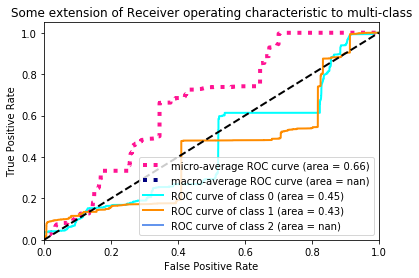

In [176]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 3

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [177]:
lr_clf = LogisticRegression(random_state = 11)

In [178]:
lr_clf.fit(X_train,y_train)
lr_pred = lr_clf.predict(X_test)

In [179]:
print('Logistic Regression Accuracy :  ',accuracy_score(y_test,lr_pred))
print('Logistic Regression  Precision :  ',precision_score(y_test,lr_pred,pos_label='positive',average='weighted'))
print('Logistic Regression  Recall :  ',recall_score(y_test,lr_pred,pos_label='positive',average='weighted'))
print('Logistic Regression  f1 :  ',f1_score(y_test,lr_pred,pos_label='positive',average='weighted'))

Logistic Regression Accuracy :   0.5638677515345171
Logistic Regression  Precision :   0.31794684122059186
Logistic Regression  Recall :   0.5638677515345171
Logistic Regression  f1 :   0.40661602096291355


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [180]:
y_score = lr_clf.predict_proba(X_test)

y_score = np.round(y_score,5)

fpr = dict()
tpr = dict()
roc_auc = dict()

In [181]:
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print('class : ',i,'==',roc_auc[i])

class :  0 == 0.3811662856163395
class :  1 == 0.520422921188823
class :  2 == nan


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:813: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [182]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_roc.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

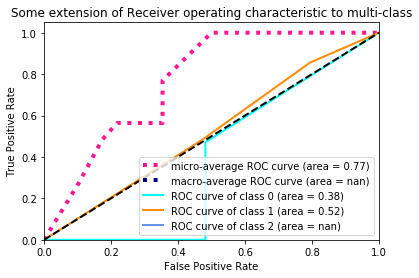

In [183]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 3

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [184]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

In [185]:
X_train

,C1,C10,C100,C11,C12,C13,C14,C15,C16,C17,...,C95,C96,C97,C98,C99,Silhouette,category,closer#,label,period
0,-0.001495,0.002059,-0.003641,0.002519,-0.000030,-0.000061,0.000266,-0.001268,-0.005870,0.004812,...,-0.001215,-0.005617,-0.000767,0.003659,-0.001297,0.126229,3.0,2,1.0,202011
1,-0.021860,0.025023,-0.030539,-0.053737,-0.034043,-0.106272,0.101318,0.046353,-0.032074,0.056494,...,-0.085919,-0.086635,-0.032728,0.003305,0.029844,0.126229,3.0,2,12.0,202011
2,-0.006153,0.000252,-0.000431,-0.007744,-0.001371,-0.012007,0.004584,-0.001146,-0.006225,0.003439,...,-0.002505,-0.002000,-0.006141,-0.000919,0.005992,0.126229,3.0,2,13.0,202011
3,-0.011715,0.010112,-0.014666,-0.018584,-0.010574,-0.035928,0.037478,0.020299,-0.011364,0.024920,...,-0.035902,-0.030800,-0.010657,0.002631,0.007532,0.126229,3.0,2,12.0,202011
4,-0.004312,0.010082,-0.009291,-0.017374,-0.011016,-0.033451,0.031159,0.015416,-0.016344,0.022197,...,-0.027211,-0.024827,-0.013575,-0.000735,0.013313,0.126229,3.0,2,12.0,202011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112261,0.002639,-0.007745,0.015926,-0.011952,-0.002111,-0.004357,-0.000599,-0.012847,-0.000155,-0.024394,...,0.005706,0.015451,0.006023,0.001769,0.004318,0.746625,1.0,2,5.0,201924
112262,-0.000535,-0.008106,0.016009,-0.012102,0.005943,-0.004983,-0.004764,-0.011634,0.001370,-0.025071,...,0.004042,0.014530,-0.000182,0.002224,-0.003322,0.746625,1.0,2,5.0,201924
112263,0.004187,0.000229,0.007715,-0.005602,0.004873,-0.005352,-0.002468,-0.003581,0.005097,-0.003656,...,-0.003402,0.004426,-0.001443,0.001934,-0.000474,0.746625,1.0,2,5.0,201924
112264,-0.002951,-0.006462,0.012489,-0.003590,-0.002220,-0.002896,-0.001683,-0.016026,0.004791,-0.019189,...,0.003951,0.013484,0.002950,0.001749,0.001292,0.746625,1.0,2,5.0,201924


In [186]:
model = Sequential()
model.add(Dense(120, input_dim=105, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [187]:
# compile the keras model
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [188]:
from keras.utils import to_categorical

y_train = y_train.apply(lambda x : x-1)

In [189]:
y_cate_train = to_categorical(y_train , num_classes=3)
#y_cate_train = y_train

In [190]:
y_cate_train

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [191]:
#y_cate_train = list(y_train)

In [192]:
#X_train

In [193]:
model.fit(X_train,y_cate_train, epochs=30, batch_size=500)

Epoch 1/30
187533/187533 [==============================] - 1s 7us/step - loss: 227.5398 - accuracy: 0.3948
Epoch 2/30
187533/187533 [==============================] - 1s 6us/step - loss: 58.3714 - accuracy: 0.3948
Epoch 3/30
187533/187533 [==============================] - 1s 6us/step - loss: 46.0092 - accuracy: 0.3941
Epoch 4/30
187533/187533 [==============================] - 1s 6us/step - loss: 26.2185 - accuracy: 0.3937
Epoch 5/30
187533/187533 [==============================] - 1s 6us/step - loss: 15.8957 - accuracy: 0.3989
Epoch 6/30
187533/187533 [==============================] - 1s 6us/step - loss: 10.4896 - accuracy: 0.4013
Epoch 7/30
187533/187533 [==============================] - 1s 6us/step - loss: 6.4947 - accuracy: 0.4075
Epoch 8/30
187533/187533 [==============================] - 1s 6us/step - loss: 1.1329 - accuracy: 0.4473
Epoch 9/30
187533/187533 [==============================] - 1s 6us/step - loss: 1.3715 - accuracy: 0.4327
Epoch 10/30
187533/187533 [============

In [194]:
X_test

,C1,C10,C100,C11,C12,C13,C14,C15,C16,C17,...,C95,C96,C97,C98,C99,Silhouette,category,closer#,label,period
0,0.193276,0.354861,0.483434,0.597638,-0.398804,1.133262,0.731398,-0.646659,-0.445156,0.258329,...,-1.047442,1.066586,-0.492452,0.110801,1.513927,0.769844,3,2,13.0,201712
1,0.053015,0.145954,0.169772,0.120207,-0.169421,0.229082,0.260403,-0.147198,-0.103073,0.047900,...,-0.245267,0.345119,-0.146398,-0.047513,0.443642,0.769844,3,2,7.0,201712
2,0.187034,0.571300,0.525449,0.168223,-0.355162,0.298243,0.894928,-0.192993,-0.046484,0.072364,...,-0.487128,0.952153,-0.561850,-0.430627,0.990200,0.769844,3,2,11.0,201712
3,0.006207,0.006518,0.006009,0.000881,-0.009848,0.008558,0.007732,-0.008319,-0.009147,0.006904,...,-0.010893,0.012300,-0.005470,0.000625,0.017307,0.769844,3,2,5.0,201712
4,0.007514,0.024106,0.028550,0.014306,-0.029238,0.029883,0.046465,-0.022211,-0.016634,0.008236,...,-0.038619,0.063352,-0.025889,-0.009849,0.080098,0.769844,3,2,5.0,201712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91066,-0.001493,0.004432,-0.000019,0.001152,0.003272,0.001117,-0.001494,-0.001195,-0.005070,0.004332,...,0.007560,0.002509,0.001765,0.003142,-0.002148,0.663485,3,2,7.0,201821
91067,0.003200,-0.004519,0.001402,0.003263,0.010584,0.003593,-0.001943,0.005533,-0.006149,0.006796,...,-0.000815,0.003557,0.000739,0.003576,-0.001527,0.663485,3,2,7.0,201821
91068,-0.001963,-0.003939,0.005902,0.004080,0.005144,0.004452,-0.009509,-0.000890,-0.001717,0.007926,...,0.001187,-0.001515,0.002502,0.009324,-0.002506,0.663485,3,2,7.0,201821
91069,0.003757,-0.005068,0.008903,0.005964,0.002714,0.005146,-0.005615,0.005638,-0.004838,0.008487,...,0.005496,-0.000107,-0.002414,0.001925,-0.008984,0.663485,3,2,7.0,201821


In [195]:
y_test = y_test.apply(lambda x : x-1)

In [196]:
y_cate_test = to_categorical(y_test , num_classes=3)

In [197]:
y_cate_test

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [198]:
score = model.evaluate(X_test, y_cate_test, batch_size=500)

91071/91071 [==============================] - 0s 3us/step


In [199]:
#score = model.evaluate(X_test, y_cate_test, batch_size=500)

In [200]:
score

[0.8296755333287947, 0.5638677477836609]

In [201]:
yhat_probs = model.predict(X_test ,batch_size=500 )

yhat_classes = model.predict_classes(X_test ,batch_size=500 )

# reduce to 1d array
#yhat_probs = yhat_probs[:, 0]
#yhat_classes = yhat_classes[:, 0]

In [202]:
yhat_probs

array([[0.41383773, 0.45430493, 0.13185729],
       [0.41383773, 0.45430493, 0.13185729],
       [0.41383773, 0.45430493, 0.13185729],
       ...,
       [0.41383773, 0.45430493, 0.13185729],
       [0.41383773, 0.45430493, 0.13185729],
       [0.41383773, 0.45430493, 0.13185729]], dtype=float32)

In [203]:
yhat_classes

array([1, 1, 1, ..., 1, 1, 1])

In [204]:
y_cate_test

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [205]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes )
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes , average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes , average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes,average='micro')
print('F1 score: %f' % f1)

Accuracy: 0.563868
Precision: 0.563868
Recall: 0.563868
F1 score: 0.563868


In [206]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

y_test_roc =label_binarize(y_test, classes=[0, 1, 2])

print(y_test)
print(y_test_roc)

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], yhat_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print('class : ',i,'==',roc_auc[i])

0        1
1        1
2        1
3        1
4        1
        ..
91066    0
91067    0
91068    0
91069    0
91070    0
Name: result, Length: 91071, dtype: int64
[[0 1 0]
 [0 1 0]
 [0 1 0]
 ...
 [1 0 0]
 [1 0 0]
 [1 0 0]]
class :  0 == 0.5
class :  1 == 0.5
class :  2 == nan


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:813: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [207]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_roc.ravel(), yhat_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

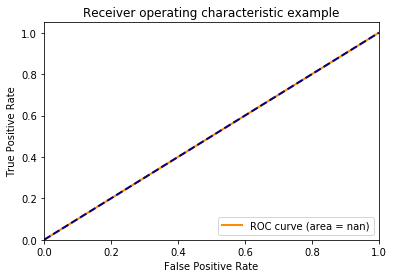

In [208]:
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


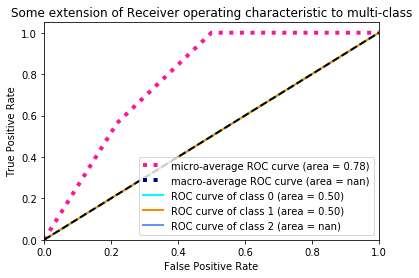

In [209]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 3

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [210]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes )
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes , average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes , average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes,average='micro')
print('F1 score: %f' % f1)

Accuracy: 0.563868
Precision: 0.563868
Recall: 0.563868
F1 score: 0.563868


In [211]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

y_test_roc =label_binarize(y_test, classes=[0, 1, 2])

print(y_test)
print(y_test_roc)

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], yhat_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print('class : ',i,'==',roc_auc[i])

0        1
1        1
2        1
3        1
4        1
        ..
91066    0
91067    0
91068    0
91069    0
91070    0
Name: result, Length: 91071, dtype: int64
[[0 1 0]
 [0 1 0]
 [0 1 0]
 ...
 [1 0 0]
 [1 0 0]
 [1 0 0]]
class :  0 == 0.5
class :  1 == 0.5
class :  2 == nan


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:813: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [212]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_roc.ravel(), yhat_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

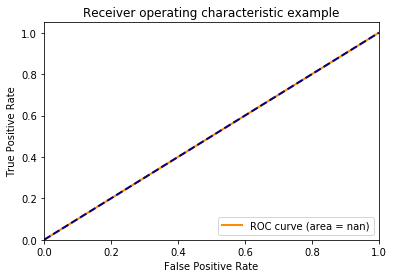

In [213]:
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


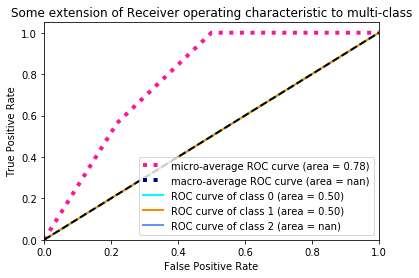

In [214]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 3

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()